# 3. Визуализация результатов

In [1]:
import os,sys
import numpy as np
from collections import Counter
from tqdm import tqdm
import math

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

## Обработка логов

In [3]:
metrics = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score']
types =   ['0/1/-1', '0/1,-1','1/0,-1','-1/0,1']

def parse_single_log(text):
    log = {}
    log_final = {}
    seed = -1
    for tp in types:
        log[tp]={}
        for metr in metrics:
            log[tp][metr] = []
    temp_name = ""
    for line in text.split('\n'):
        if not '\t' in line: 
            continue
        name, value = line.split('\t')
        if 'seed' in name:
            if seed != -1:
                log_final[seed] = log
            seed = int(value)
            continue
        if 'class classification' in name:
            temp_name = value
        else:
            log[temp_name][name].append(float(value))
        log_final[seed] = log
    return log

# Отрисовка результатов

In [4]:
def drawFullStats(
                FULL_STATS, 
                metrics = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score'],
                types =   ['0/1/-1', '0/1,-1','1/0,-1','-1/0,1']):
    for key1 in types:
        for key2 in metrics:
            fig = plt.figure()
            fig.set_size_inches(10.5, 5.5)
            plt.title(key1+'    '+key2)

            for obj in FULL_STATS:
                lst = obj[0][key1][key2]
                M = np.array(lst).mean()
                D = np.array(lst).std()
                if 'zero baseline' in obj[2].lower():
                    plt.hist(lst,
                             color = obj[1], 
                             label = obj[2], 
                             normed=True, 
                             alpha = 0.8, 
                             bins = np.arange(0, 1, 0.01),
                            )
                else:
                    plt.hist(lst,color = obj[1], label = obj[2], normed=True, alpha = 0.8)
                print("\nstats "+obj[2]+"\n  M = "+str(M)[:5]+' ( +-'+str(3*D)[:5]+' )\n'+"  D = "+str(D)[:5])
                
            plt.legend()
            plt.show()
    return

In [5]:
def draw_class_matrix(log, title, draw = True):
    M = [np.zeros((3,3)) for i in range(log.count('matrix_cross_valid'))]
    ind = 0
    for c, line in enumerate(log.split('\n')):
        if line == 'matrix_cross_valid':
            tmp = [[int(k) for k in i.split(',')] for i in log.split('\n')[c+1:c+4]]
            M[ind] = np.array(tmp)
            ind+=1

    M_mean, M_std =  np.zeros((3,3), dtype = int),  np.zeros((3,3), dtype = int) 
    for i in range(3):
        for k in range(3):
            M_mean[i][k] = int(sum(t[i][k] for t in M)/len(M))
            M_std[i][k] = math.sqrt(sum([(M_mean[i][k] - t[i][k])**2 for t in M])*1.0/len(M))    
    M_mean = M_mean/sum(M_mean.ravel())
    M_std = M_std/sum(M_std.ravel())**2
    if draw:
        fig, ax = plt.subplots()
        cax = ax.matshow(M_mean)
        ax.set_title(str(title.replace('_log','')))
        cbar = fig.colorbar(cax)
        ind_array = np.arange(0, 3, 1)
        x, y = np.meshgrid(ind_array, ind_array)

        for x_val, y_val in zip(x.flatten(), y.flatten()):
            ax.text(x_val, y_val, str(M_mean[x_val, y_val])[:5]+"+-"+str(6*M_std[x_val, y_val])[:5], va='center', ha='center')
#         plt.show()
        return plt
    else:
        for i in range(3):
            for k in range(3):
                sys.stdout.write(str(M_mean[i,k])[:5]+"+-"+str(M_std[i,k]*3)[:5]+'\t')
            sys.stdout.write('\n')
    return 

## Загрузим файлы с логами

In [6]:
LOG_W2V_default_NN = parse_single_log(open('logs/NNlogsW2V_default.txt','r').read())
LOG_W2V_default_SVM = parse_single_log(open('logs/SVMlogsW2V_default.txt','r').read())
LOG_W2V_default_LR = parse_single_log(open('logs/LogReglogsW2V_default.txt','r').read())

LOG_token_NN = parse_single_log(open('logs/NNlogs.txt','r').read())
LOG_token_SVM = parse_single_log(open('logs/SVMlogs.txt','r').read())
LOG_token_LR = parse_single_log(open('logs/LogReglogs.txt','r').read())

LOG_W2V_vk_NN = parse_single_log(open('logs/NNlogsW2V_vkmy.txt','r').read())
LOG_W2V_vk_SVM = parse_single_log(open('logs/SVMlogsW2V_vkmy.txt','r').read())
LOG_W2V_vk_LR = parse_single_log(open('logs/LogReglogsW2V_vkmy.txt','r').read())

LOG_random = parse_single_log(open('logs/Randomlogs.txt','r').read())
LOG_zero = parse_single_log(open('logs/Zerologs.txt','r').read())

# Результат логистической регрессии


stats LogReg w2v vk
  M = 0.709 ( +-0.029 )
  D = 0.009

stats LogReg token
  M = 0.705 ( +-0.032 )
  D = 0.010

stats LogReg w2v default
  M = 0.683 ( +-0.027 )
  D = 0.009

stats Zero baseline
  M = 0.616 ( +-0.0 )
  D = 0.0

stats Random
  M = 0.478 ( +-0.039 )
  D = 0.013


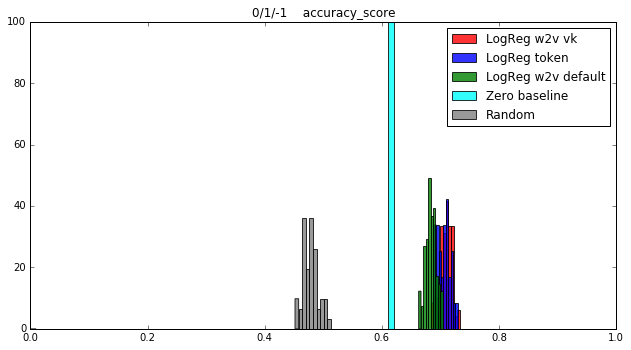

In [7]:
drawFullStats(
    [
        [LOG_W2V_vk_LR, 'red', 'LogReg w2v vk'],
        [LOG_token_LR, 'blue', 'LogReg token'],
        [LOG_W2V_default_LR, 'green', 'LogReg w2v default'],
        [LOG_zero, 'cyan', 'Zero baseline'],
        [LOG_random, 'grey', 'Random']
    ], 
    metrics = ['accuracy_score'],
    types =   ['0/1/-1'])

# Результат SVM


stats SVM w2v vk
  M = 0.706 ( +-0.034 )
  D = 0.011

stats SVM token
  M = 0.701 ( +-0.035 )
  D = 0.011

stats SVM w2v default
  M = 0.678 ( +-0.026 )
  D = 0.008

stats Zero baseline
  M = 0.616 ( +-0.0 )
  D = 0.0

stats Random
  M = 0.478 ( +-0.039 )
  D = 0.013


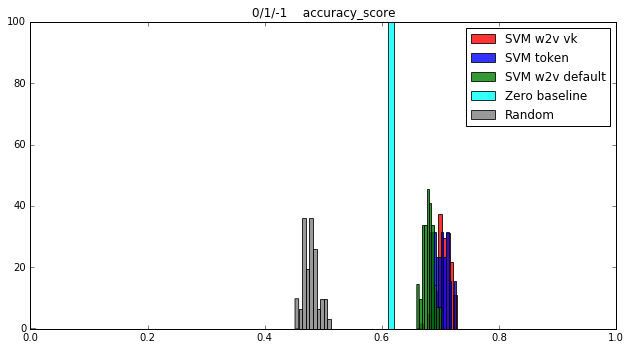

In [28]:
drawFullStats(
    [
        [LOG_W2V_vk_SVM, 'red', 'SVM w2v vk'],
        [LOG_token_SVM, 'blue', 'SVM token'],
        [LOG_W2V_default_SVM, 'green', 'SVM w2v default'],
        [LOG_zero, 'cyan', 'Zero baseline'],
        [LOG_random, 'grey', 'Random']
    ], 
    metrics = ['accuracy_score'],
    types =   ['0/1/-1'])

# Результат нейронной сети


stats Neural Network w2v vk
  M = 0.706 ( +-0.162 )
  D = 0.054

stats Neural Network token
  M = 0.709 ( +-0.033 )
  D = 0.011

stats Neural Network w2v default
  M = 0.682 ( +-0.035 )
  D = 0.011

stats Zero baseline
  M = 0.616 ( +-0.0 )
  D = 0.0

stats Random
  M = 0.478 ( +-0.039 )
  D = 0.013


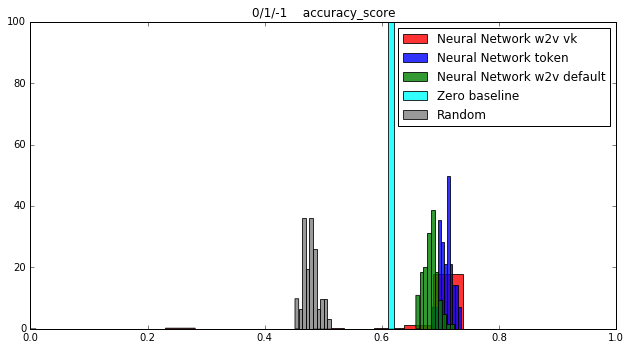

In [29]:
drawFullStats(
    [
        [LOG_W2V_vk_NN, 'red', 'Neural Network w2v vk'],
        [LOG_token_NN, 'blue', 'Neural Network token'],
        [LOG_W2V_default_NN, 'green', 'Neural Network w2v default'],
        [LOG_zero, 'cyan', 'Zero baseline'],
        [LOG_random, 'grey', 'Random']
    ], 
    metrics = ['accuracy_score'],
    types =   ['0/1/-1'])

# Лучшие результаты:


stats LogReg w2v vk
  M = 0.709 ( +-0.029 )
  D = 0.009

stats SVM w2v vk
  M = 0.706 ( +-0.034 )
  D = 0.011

stats Neural Network w2v vk
  M = 0.706 ( +-0.162 )
  D = 0.054

stats Zero baseline
  M = 0.616 ( +-0.0 )
  D = 0.0

stats Random
  M = 0.478 ( +-0.039 )
  D = 0.013


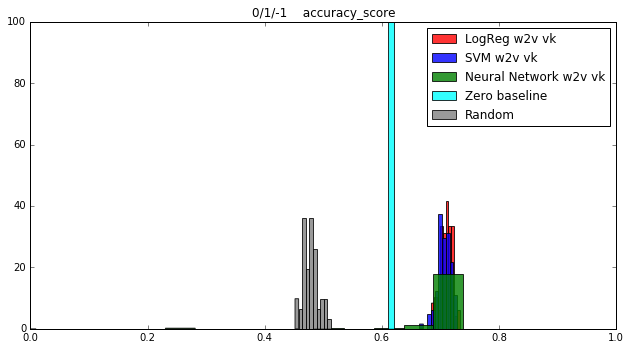


stats LogReg w2v vk
  M = 0.709 ( +-0.029 )
  D = 0.009

stats SVM w2v vk
  M = 0.706 ( +-0.034 )
  D = 0.011

stats Neural Network w2v vk
  M = 0.706 ( +-0.162 )
  D = 0.054

stats Zero baseline
  M = 0.616 ( +-0.0 )
  D = 0.0

stats Random
  M = 0.478 ( +-0.039 )
  D = 0.013


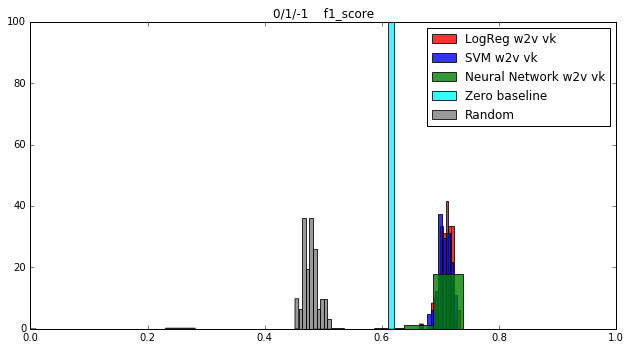


stats LogReg w2v vk
  M = 0.914 ( +-0.012 )
  D = 0.004

stats SVM w2v vk
  M = 0.909 ( +-0.025 )
  D = 0.008

stats Neural Network w2v vk
  M = 0.903 ( +-0.204 )
  D = 0.068

stats Zero baseline
  M = 0.92 ( +-0.0 )
  D = 0.0

stats Random
  M = 0.853 ( +-0.012 )
  D = 0.004


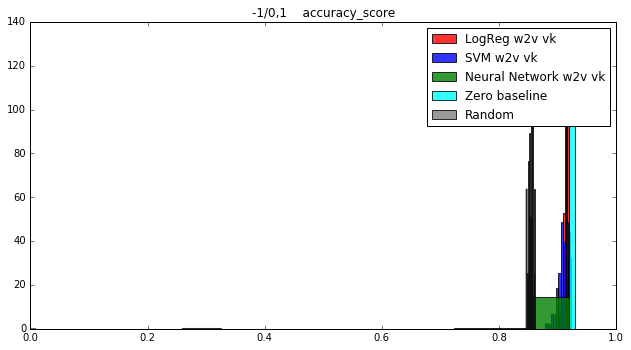


stats LogReg w2v vk
  M = 0.152 ( +-0.111 )
  D = 0.037

stats SVM w2v vk
  M = 0.177 ( +-0.185 )
  D = 0.061

stats Neural Network w2v vk
  M = 0.096 ( +-0.273 )
  D = 0.091

stats Zero baseline
  M = 0.0 ( +-0.0 )
  D = 0.0

stats Random
  M = 0.082 ( +-0.079 )
  D = 0.026


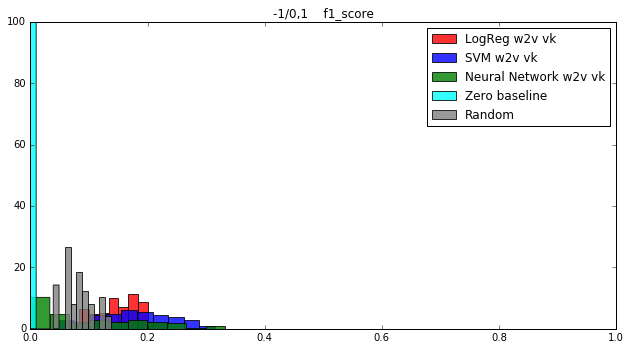

In [30]:
drawFullStats(
    [
        [LOG_W2V_vk_LR, 'red', 'LogReg w2v vk'],
        [LOG_W2V_vk_SVM, 'blue', 'SVM w2v vk'],
        [LOG_W2V_vk_NN, 'green', 'Neural Network w2v vk'],
        [LOG_zero, 'cyan', 'Zero baseline'],
        [LOG_random, 'grey', 'Random']
    ], 
    metrics = ['accuracy_score','f1_score'],
    types =   ['0/1/-1','-1/0,1'])

# Лучшие результаты соотношение по классам

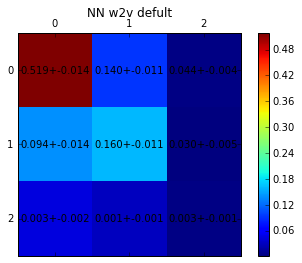

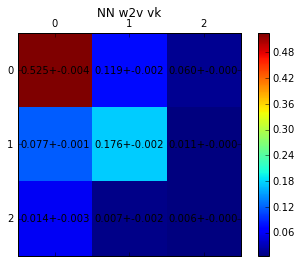

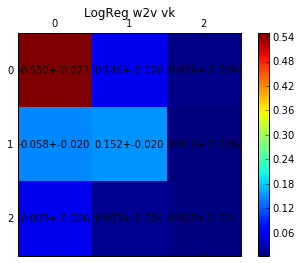

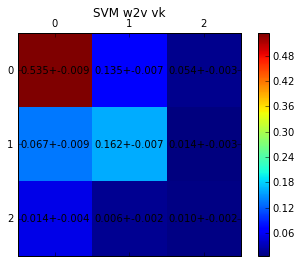

In [39]:
plt = draw_class_matrix(open('logs/NNlogsW2V_default.txt','r').read(),'NN w2v defult', draw = True)
plt.show()

plt = draw_class_matrix(open('logs/NNlogsW2V_vkmy.txt','r').read(),'NN w2v vk', draw = True)
plt.show()

plt = draw_class_matrix(open('logs/LogReglogsW2V_vkmy.txt','r').read(),'LogReg w2v vk', draw = True)
plt.show()

plt = draw_class_matrix(open('logs/SVMlogsW2V_vkmy.txt','r').read(),'SVM w2v vk', draw = True)
plt.show()


stats Neural network token
  M = 0.709 ( +-0.033 )
  D = 0.011

stats Neural network w2v gensim
  M = 0.682 ( +-0.035 )
  D = 0.011

stats Neural network w2v vk
  M = 0.706 ( +-0.162 )
  D = 0.054

stats LogReg  token
  M = 0.705 ( +-0.032 )
  D = 0.010

stats LogReg w2v gensim
  M = 0.683 ( +-0.027 )
  D = 0.009

stats LogReg  w2v vk
  M = 0.709 ( +-0.029 )
  D = 0.009

stats SVM  token
  M = 0.701 ( +-0.035 )
  D = 0.011

stats SVM w2v gensim
  M = 0.678 ( +-0.026 )
  D = 0.008

stats SVM  w2v vk
  M = 0.706 ( +-0.034 )
  D = 0.011

stats random
  M = 0.478 ( +-0.039 )
  D = 0.013

stats zero baseline
  M = 0.616 ( +-0.0 )
  D = 0.0


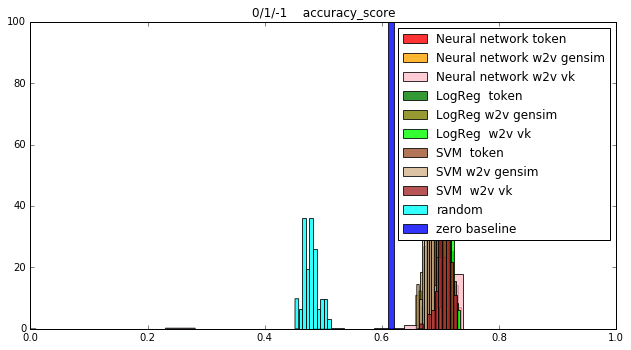

In [45]:
# Тут цвета норм, не стал удалять
drawFullStats([
            [LOG_token_NN, 'red', 'Neural network token'], 
              [LOG_W2V_default_NN, 'orange', 'Neural network w2v gensim'],
              [LOG_W2V_vk_NN, 'pink', 'Neural network w2v vk'],
              [LOG_token_LR, 'green', 'LogReg  token'], 
              [LOG_W2V_default_LR, 'olive', 'LogReg w2v gensim'],
              [LOG_W2V_vk_LR, 'lime',  'LogReg  w2v vk'],
              [LOG_token_SVM, 'sienna', 'SVM  token'], 
              [LOG_W2V_default_SVM, 'tan', 'SVM w2v gensim'],
              [LOG_W2V_vk_SVM, 'brown',  'SVM  w2v vk'],
              [LOG_random, 'cyan', 'random'],
              [LOG_zero, 'blue', 'zero baseline']
              ],
              metrics=['accuracy_score'],
              types=['0/1/-1'] )


stats LogReg  w2v vk
  M = 0.914 ( +-0.012 )
  D = 0.004

stats SVM  w2v vk
  M = 0.909 ( +-0.025 )
  D = 0.008

stats random
  M = 0.853 ( +-0.012 )
  D = 0.004

stats Neural network w2v vk
  M = 0.914 ( +-0.020 )
  D = 0.006

stats zero baseline
  M = 0.92 ( +-0.0 )
  D = 0.0


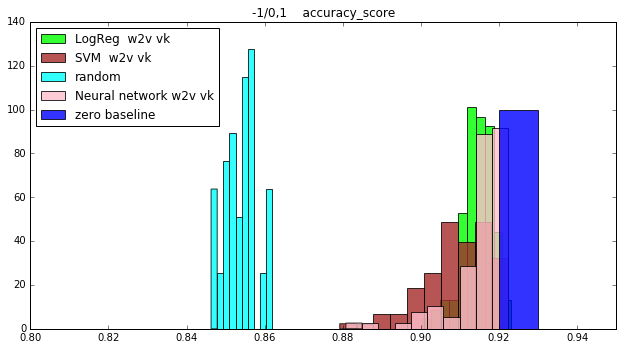

In [40]:
# Тут цвета норм, не стал удалять
def drawFullStats(
                FULL_STATS, 
                metrics = ['accuracy_score', 'f1_score', 'precision_score', 'recall_score'],
                types =   ['0/1/-1', '0/1,-1','1/0,-1','-1/0,1']):
    for key1 in types:
        for key2 in metrics:
            fig = plt.figure()
            fig.set_size_inches(10.5, 5.5)
            plt.title(key1+'    '+key2)

            for obj in FULL_STATS:
                lst = obj[0][key1][key2]
                M = np.array(lst).mean()
                D = np.array(lst).std()
                if 'zero baseline' in obj[2].lower():
                    plt.hist(lst,
                             color = obj[1], 
                             label = obj[2], 
                             normed=True, 
                             alpha = 0.8, 
                             bins = np.arange(0, 1, 0.01),
                            )
                else:
                    plt.hist(lst,color = obj[1], label = obj[2], normed=True, alpha = 0.8)
                print("\nstats "+obj[2]+"\n  M = "+str(M)[:5]+' ( +-'+str(3*D)[:5]+' )\n'+"  D = "+str(D)[:5])
                
#             plt.legend()
#             plt.show()
    return plt

plt = drawFullStats([
#             [LOG_token_NN, 'red', 'Neural network token'], 
#               [LOG_W2V_default_NN, 'orange', 'Neural network w2v wikipedia'],
#               [LOG_token_LR, 'green', 'LogReg  token'], 
#               [LOG_W2V_default_LR, 'olive', 'LogReg w2v wikipedia'],
              [LOG_W2V_vk_LR, 'lime',  'LogReg  w2v vk'],
#               [LOG_token_SVM, 'sienna', 'SVM  token'], 
#               [LOG_W2V_default_SVM, 'tan', 'SVM w2v wikipedia'],
              [LOG_W2V_vk_SVM, 'brown',  'SVM  w2v vk'],
              [LOG_random, 'cyan', 'random'],
              [LOG_W2V_vk_NN, 'pink', 'Neural network w2v vk'],
              [LOG_zero, 'blue', 'zero baseline']
              ],
              metrics=['accuracy_score'],
              types=['-1/0,1'] )
plt.xlim((0.80,0.95))
plt.legend(loc="upper left")
plt.show()

In [30]:
LOG_W2V_vk_NN['0/1/-1']['accuracy_score'] = list(filter(lambda x:x>0.65, LOG_W2V_vk_NN['0/1/-1']['accuracy_score']))
LOG_W2V_vk_NN['0/1/-1']['f1_score'] = list(filter(lambda x:x>0.65, LOG_W2V_vk_NN['0/1/-1']['f1_score']))

In [39]:
LOG_W2V_vk_NN['-1/0,1']['accuracy_score'] = list(filter(lambda x:x>0.88, LOG_W2V_vk_NN['-1/0,1']['accuracy_score']))